In [ ]:
import loompy
import glob
import velocyto as vcy
%matplotlib inline
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint

Load data

In [3]:
vlm = vcy.load_velocyto_hdf5('../output/velocyto/10x-180504-downsampled36_tsne_velocity.hdf5')

In [4]:
vlm.set_clusters(vlm.ca['sample_name'])

In [5]:
vlm.ca['CellID'] = [x.decode('utf8') for x in vlm.ca['CellID']]
vlm.ca['sample_name_x'] = [x.decode('utf8') for x in vlm.ca['sample_name_x']]
vlm.ca['sample_name'] = [x.decode('utf8') for x in vlm.ca['sample_name']]
vlm.ca['Phase'] = [x.decode('utf8') for x in vlm.ca['Phase']]
vlm.ca['depot'] = [x.decode('utf8') for x in vlm.ca['depot']]

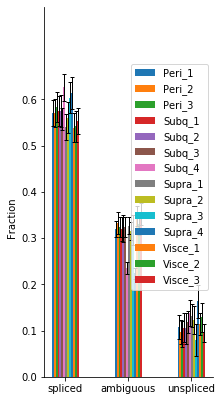

In [8]:
vlm.plot_fractions()

Set color dictionaries

In [13]:
phase_colors = {"G1": np.array([246, 119, 112]), "G2M": np.array([27,184,64]), "S": np.array([100,158,252])}
sample_colors = {"Peri_1": np.array([246,119,112]), "Peri_2": np.array([225,136,33]), "Peri_3": np.array([195,153,33]), "Subq_1": np.array([153,167,32]), "Subq_2": np.array([87,178,31]), "Subq_3": np.array([28,186,91]), "Subq_4": np.array([30,191,149]), "Supra_1": np.array([31,191,195]), "Supra_2": np.array([30,183,233]), "Supra_3": np.array([30,166,252]), "Supra_4": np.array([165,141,252]), "Visce_1": np.array([221,117,245]), "Visce_2": np.array([249,102,213]), "Visce_3": np.array([253,105,168])}
depot_colors = {"Peri": np.array([246,119,112]), "Subq": np.array([125,172,31]), "Supra": np.array([31,191,195]), "Visce": np.array([198,128,252])}

phase_colors = {k:v/256 for k, v in phase_colors.items()}
sample_colors = {k:v/256 for k, v in sample_colors.items()}
depot_colors = {k:v/256 for k, v in depot_colors.items()}

vlm.set_clusters(vlm.ca['sample_name'], cluster_colors_dict=sample_colors)

Some PCA plots. The colours represent the different samples.

Text(0,0.5,'PC5')

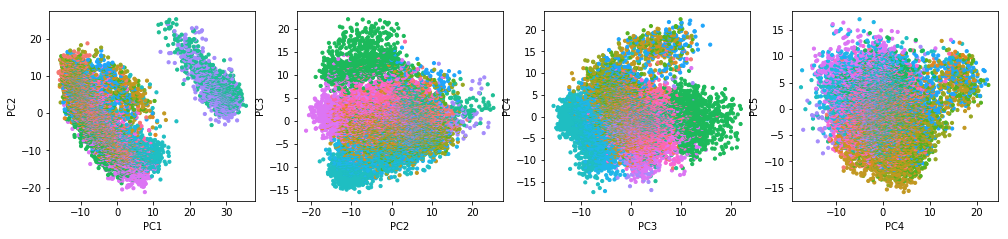

In [14]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], s=10, c=vlm.colorandum)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,1], vlm.pcs[:,2], s=10, c=vlm.colorandum)
plt.xlabel("PC2"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,2], vlm.pcs[:,3], s=10, c=vlm.colorandum)
plt.xlabel("PC3"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,3], vlm.pcs[:,4],s=10, c=vlm.colorandum)
plt.xlabel("PC4"); plt.ylabel("PC5")

Coloured on cell cycle

Text(0,0.5,'PC5')

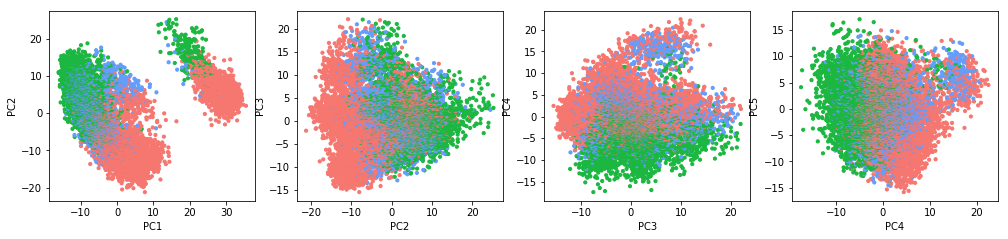

In [15]:
vlm.set_clusters(vlm.ca["Phase"], cluster_colors_dict=phase_colors)
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], s=10, c=vlm.colorandum)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,1], vlm.pcs[:,2], s=10, c=vlm.colorandum)
plt.xlabel("PC2"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,2], vlm.pcs[:,3], s=10, c=vlm.colorandum)
plt.xlabel("PC3"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,3], vlm.pcs[:,4],s=10, c=vlm.colorandum)
plt.xlabel("PC4"); plt.ylabel("PC5")

<h3>TSNE plots and velocity projection</h3>

(0.8, 2.0, -1.0, 8.0)

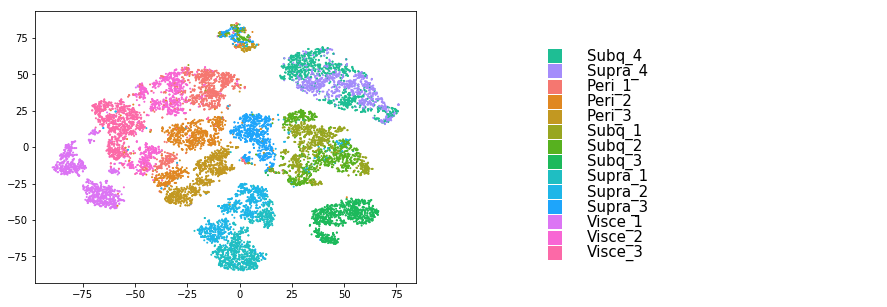

In [16]:
vlm.set_clusters(vlm.ca['sample_name'], cluster_colors_dict=sample_colors)

plt.figure(figsize=(15,5))

plt.subplot(121)
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=1)

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['sample_name_x'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)

plt.axis("off")

{'G1': array([0.9609375 , 0.46484375, 0.4375    ]), 'G2M': array([0.10546875, 0.71875   , 0.25      ]), 'S': array([0.390625 , 0.6171875, 0.984375 ])}


(0.8, 2.0, -1.0, 8.0)

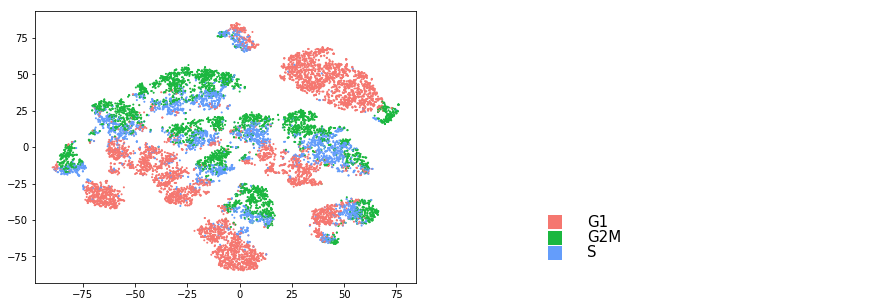

In [17]:
vlm.set_clusters(vlm.ca["Phase"], cluster_colors_dict=phase_colors)
plt.figure(figsize=(15,5))

plt.subplot(121)
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=1)

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['Phase'][i]] = vlm.colorandum[i]

print(colors_dict)
plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)

plt.axis("off")

(0.8, 2.0, -1.0, 8.0)

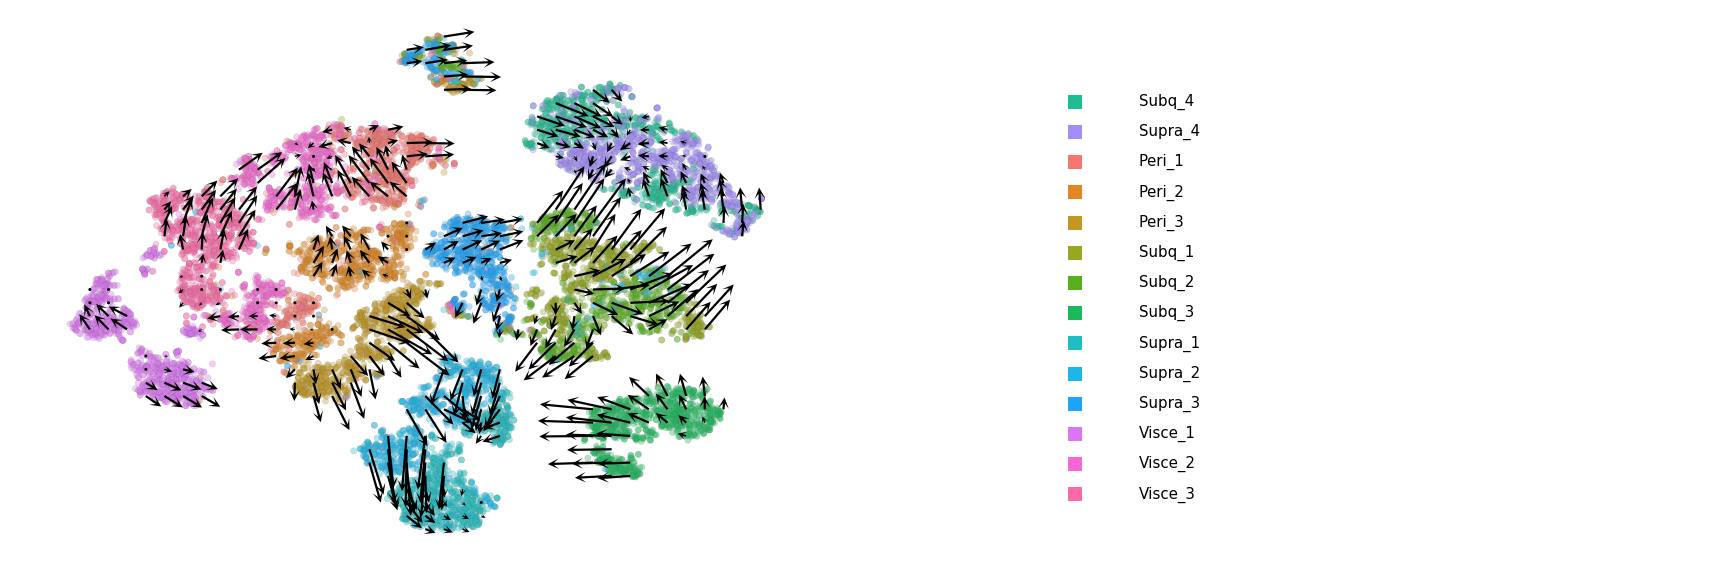

In [18]:
vlm.set_clusters(vlm.ca['sample_name'], sample_colors)
plt.figure(None,(30,10))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['sample_name_x'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

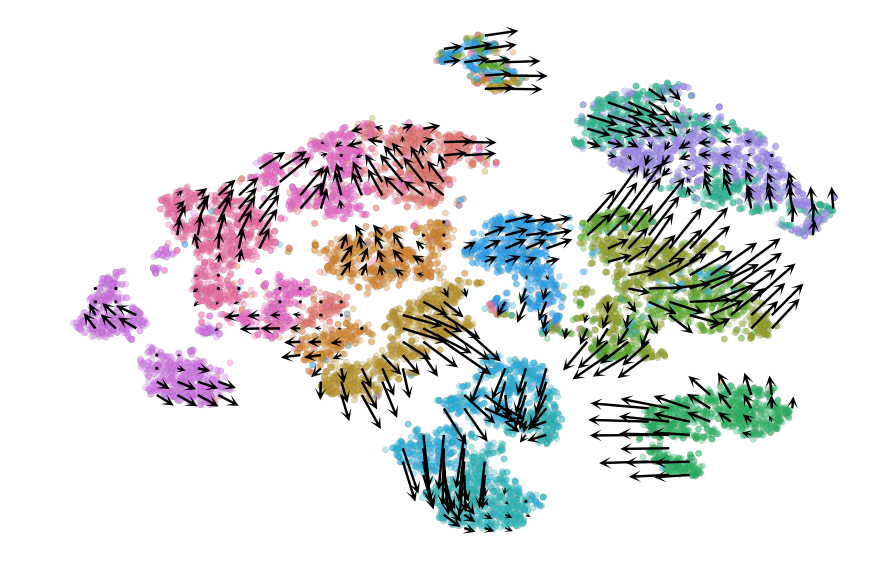

In [19]:
vlm.set_clusters(vlm.ca['sample_name'], sample_colors)
plt.figure(None,(15,10))
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


(0.8, 2.0, -1.0, 8.0)

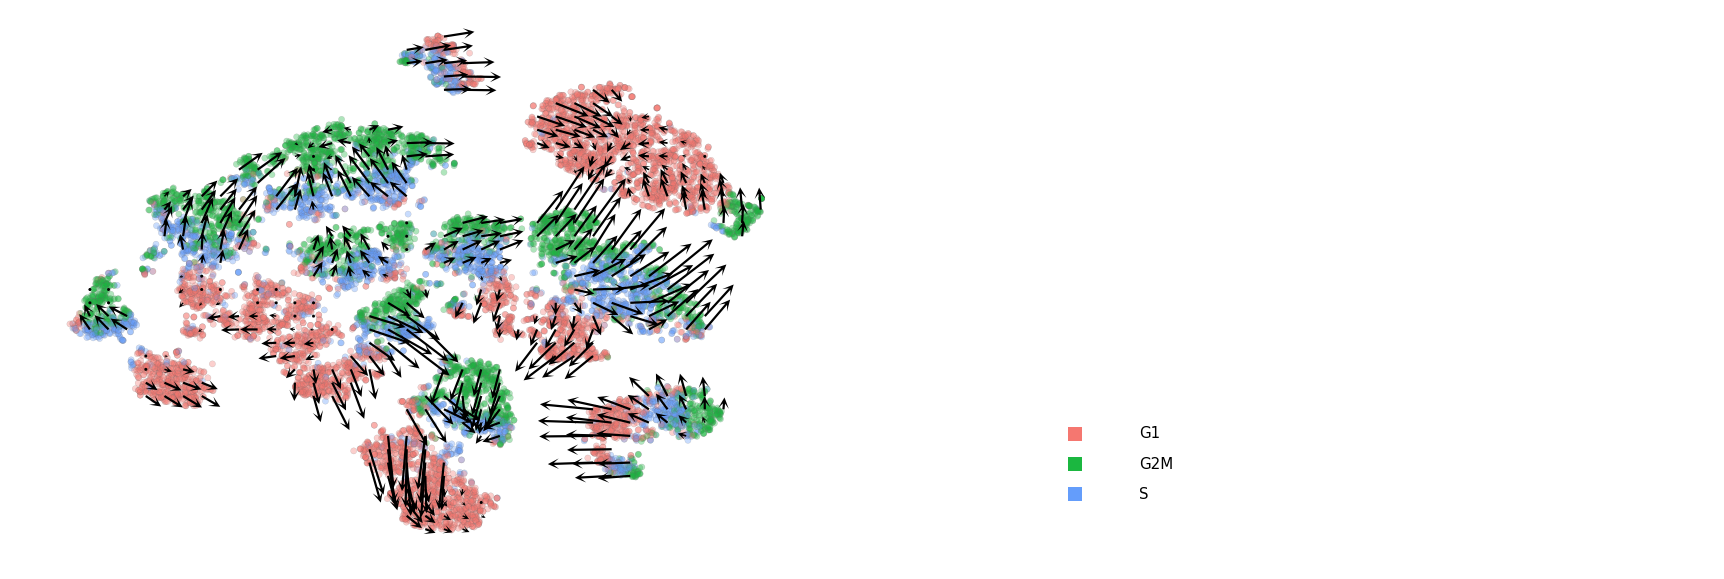

In [20]:
vlm.set_clusters(vlm.ca["Phase"], phase_colors)

plt.figure(None,(30,10))
plt.subplot(121)

vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['Phase'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

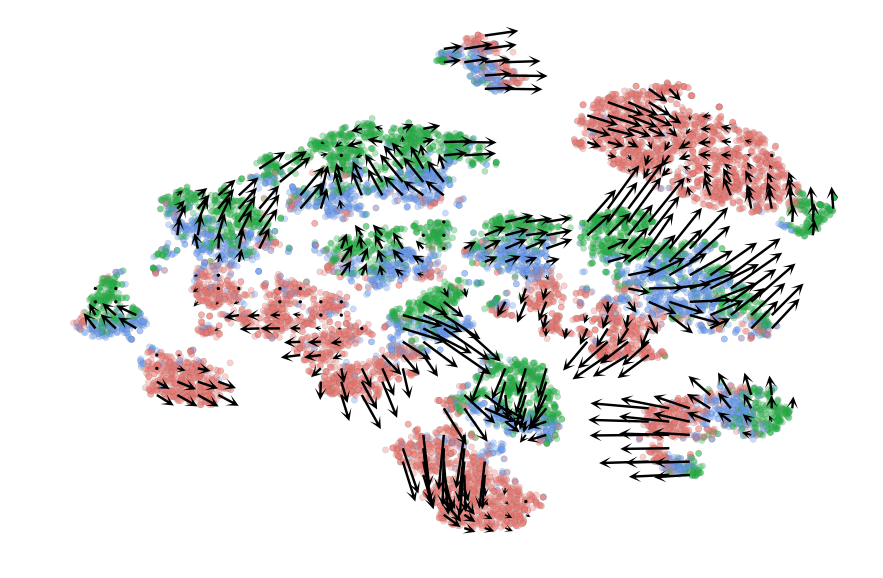

In [21]:
vlm.set_clusters(vlm.ca["Phase"], phase_colors)
plt.figure(None,(15,10))
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")

(0.8, 2.0, -1.0, 8.0)

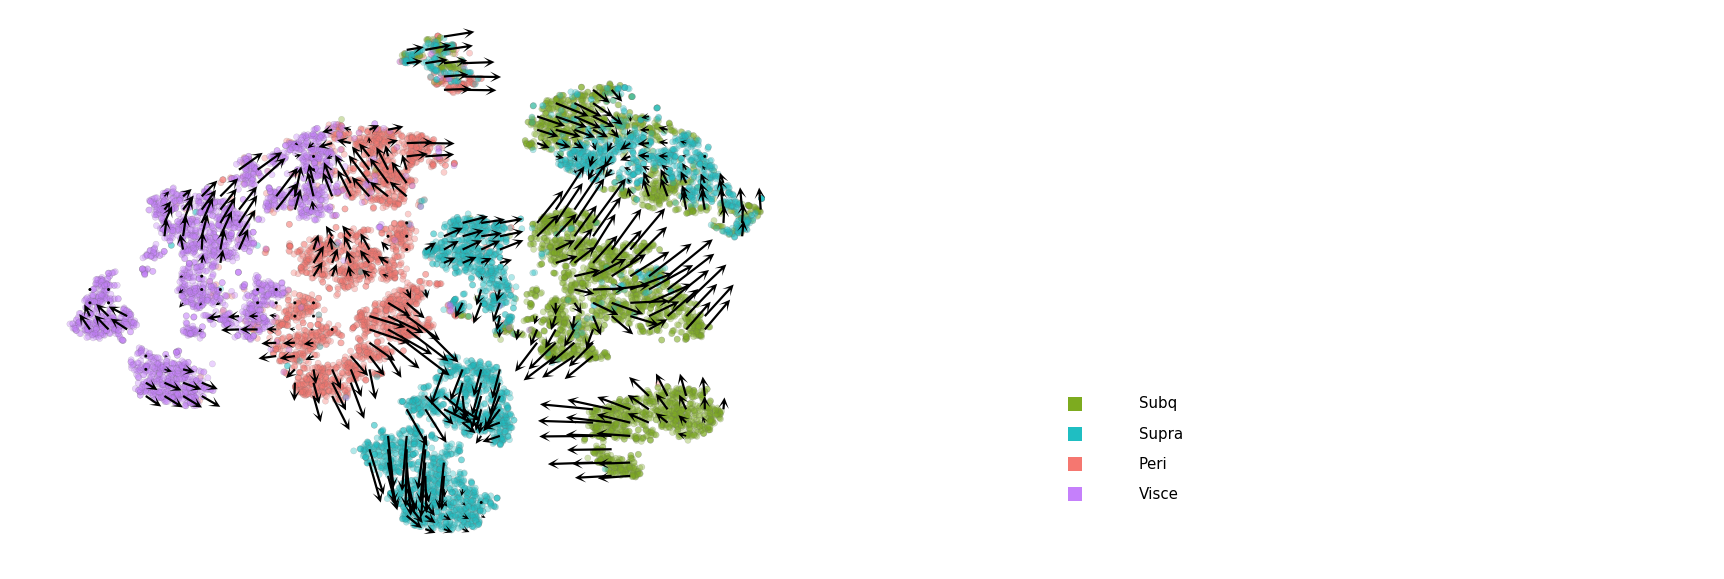

In [25]:
vlm.set_clusters(vlm.ca['depot'], depot_colors)
plt.figure(None,(30,10))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['depot'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

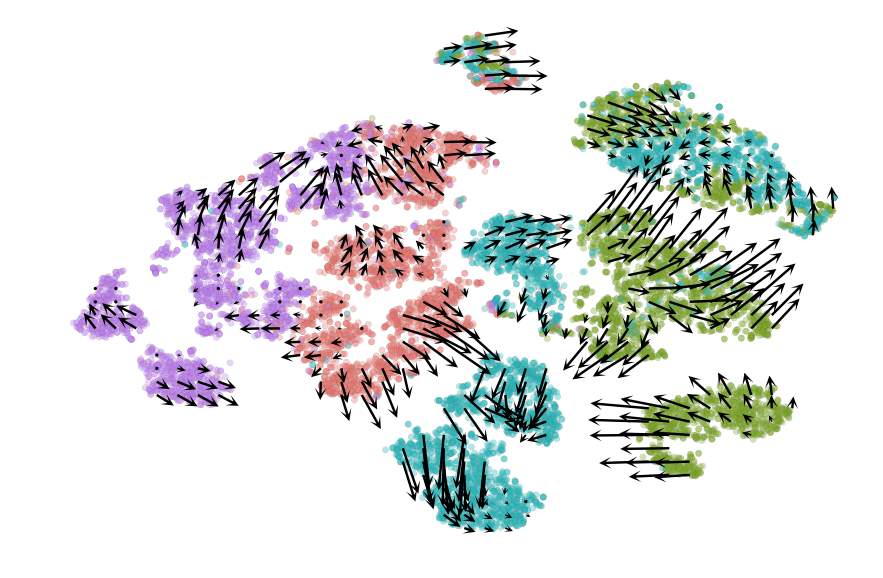

In [28]:
vlm.set_clusters(vlm.ca['depot'], depot_colors)
plt.figure(None,(15,10))
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")

<h3>Figures for report</h3>

In [50]:
vlm.set_clusters(vlm.ca['sample_name'], sample_colors)
plt.figure(None,(45,30))
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":2, "edgecolor":"0.4", "s":400, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")

plt.savefig('../plots/180504_velocyto_samplename.pdf', bbox_inches='tight')
plt.savefig('../plots/180504_velocyto_samplename.png', bbox_inches='tight')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


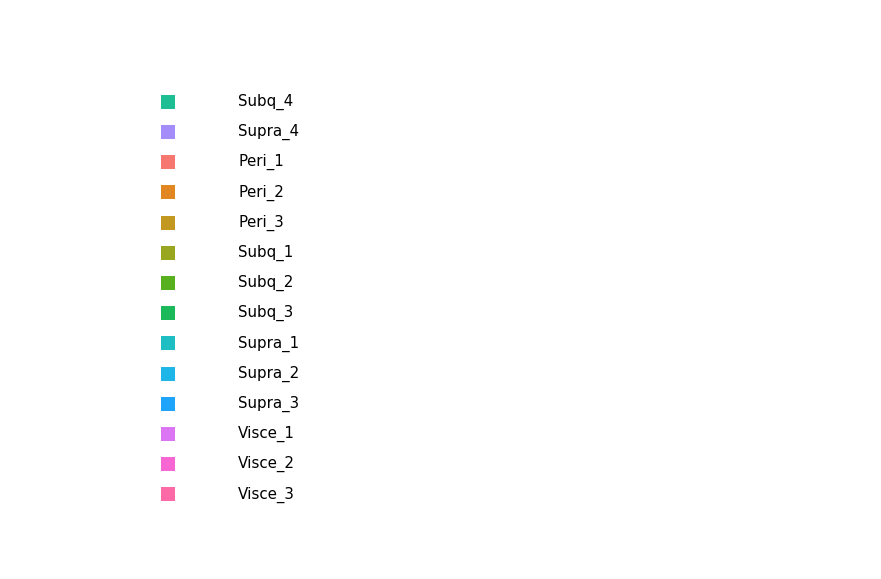

In [43]:
vlm.set_clusters(vlm.ca['sample_name'], sample_colors)
colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['sample_name'][i]] = vlm.colorandum[i]
    
plt.figure(None,(15,10))
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')
plt.savefig('../plots/180504_velocyto_samplename_legend.pdf', bbox_inches='tight')

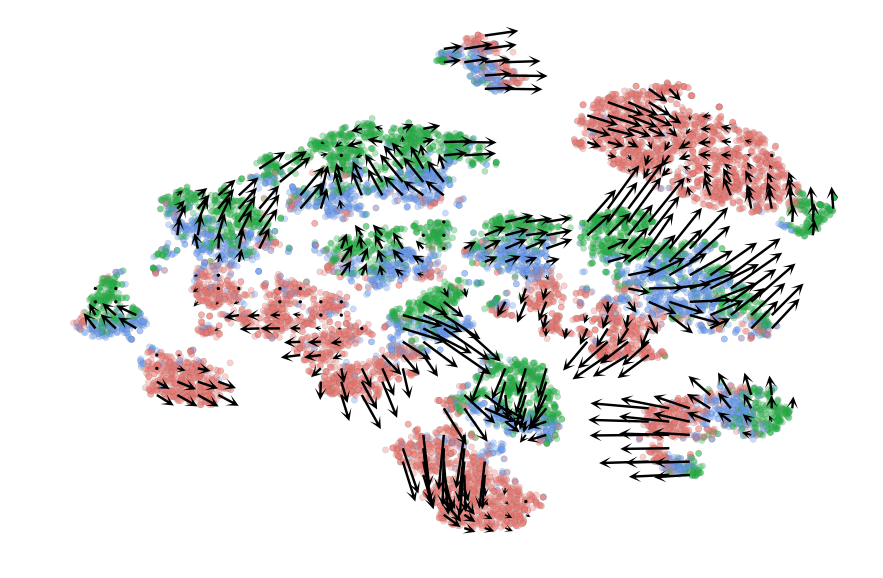

In [36]:
vlm.set_clusters(vlm.ca['Phase'], phase_colors)
plt.figure(None,(45,30))
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":2, "edgecolor":"0.4", "s":400, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")

plt.savefig('../plots/180504_velocyto_phase.pdf', bbox_inches='tight')
plt.savefig('../plots/180504_velocyto_phase.png', bbox_inches='tight')

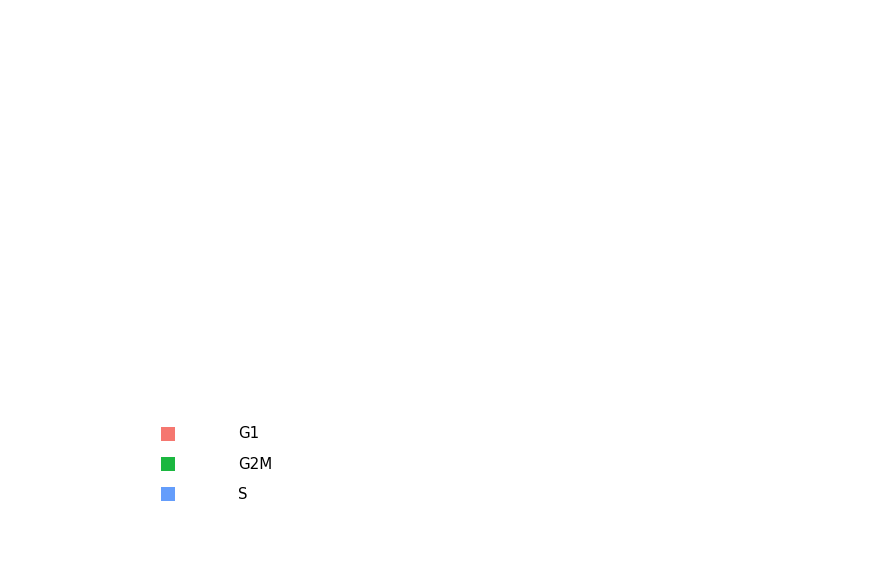

In [40]:
vlm.set_clusters(vlm.ca['Phase'], phase_colors)
colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['Phase'][i]] = vlm.colorandum[i]
    
plt.figure(None,(15,10))
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')
plt.savefig('../plots/180504_velocyto_phase_legend.pdf', bbox_inches='tight')